In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import load_img, img_to_array
import glob
import matplotlib.pyplot as plt

In [3]:
# Define paths for training and validation
train_dir = r"C:\Users\gayat\Downloads\Plant_Disease_Dataset\New Plant Diseases Dataset(Augmented)\train"
valid_dir = r"C:\Users\gayat\Downloads\Plant_Disease_Dataset\New Plant Diseases Dataset(Augmented)\valid"


# Image size and batch size
image_size = (200, 200)
batch_size = 64

# Data generators
train_datagen = ImageDataGenerator(rescale=1.0/255)
valid_datagen = ImageDataGenerator(rescale=1.0/255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

valid_data = valid_datagen.flow_from_directory(
    valid_dir,   
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 18504 images belonging to 10 classes.
Found 4626 images belonging to 10 classes.


In [10]:
# Define test directory
test_dir = r"C:\Users\gayat\Downloads\Plant_Disease_Dataset\New Plant Diseases Dataset(Augmented)\test"

# Get all test image paths
test_image_paths = glob.glob(test_dir + "/*.JPG")

# Preprocess test images
test_images = []
for img_path in test_image_paths:
    img = load_img(img_path, target_size=(200, 200))  
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    test_images.append(img_array)

test_images = np.array(test_images)  # Convert to NumPy array
print(f"Loaded {len(test_images)} test images.")


Loaded 28 test images.


In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_data.class_indices), activation='softmax')  # Number of classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\gayat\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 97, 97, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 46, 46, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 67712)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      34,669,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,767,434 (132.63 MB)

 Trainable params: 34,767,434 (132.63 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
from tensorflow.keras.callbacks import EarlyStopping

# Add EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=15,
    callbacks=[early_stopping]
)



C:\Users\gayat\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
290/290 ━━━━━━━━━━━━━━━━━━━━ 909s 3s/step - accuracy: 0.5939 - loss: 1.2073 - val_accuracy: 0.9241 - val_loss: 0.2587
Epoch 2/15
290/290 ━━━━━━━━━━━━━━━━━━━━ 833s 3s/step - accuracy: 0.9079 - loss: 0.2723 - val_accuracy: 0.9466 - val_loss: 0.1420
Epoch 3/15
290/290 ━━━━━━━━━━━━━━━━━━━━ 886s 3s/step - accuracy: 0.9539 - loss: 0.1435 - val_accuracy: 0.9738 - val_loss: 0.0821
Epoch 4/15
290/290 ━━━━━━━━━━━━━━━━━━━━ 872s 3s/step - accuracy: 0.9738 - loss: 0.0818 - val_accuracy: 0.9475 - val_loss: 0.1768
Epoch 5/15
290/290 ━━━━━━━━━━━━━━━━━━━━ 916s 3s/step - accuracy: 0.9711 - loss: 0.0907 - val_accuracy: 0.9676 - val_loss: 0.1066
Epoch 6/15
290/290 ━━━━━━━━━━━━━━━━━━━━ 884s 3s/step - accuracy: 0.9682 - loss: 0.0940 - val_accuracy: 0.9650 - val_loss: 0.1010
Epoch 7/15
290/290 ━━━━━━━━━━━━━━━━━━━━ 940s 3s/step - accuracy: 0.9846 - loss: 0.0493 - val_accuracy: 0.9704 - val_loss: 0.0980
Epoch 8/15
290/290 ━━━━━━━━━━━━━━━━━━━━ 1976s 7s/step - accuracy: 0.9885 - loss: 0.0344 - val_acc

In [7]:
model.save('plant_disease_model.h5')

In [8]:
# Evaluate on validation data
val_loss, val_acc = model.evaluate(valid_data)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")


73/73 ━━━━━━━━━━━━━━━━━━━━ 19s 260ms/step - accuracy: 0.9814 - loss: 0.0657
Validation Loss: 0.0656
Validation Accuracy: 0.9803


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


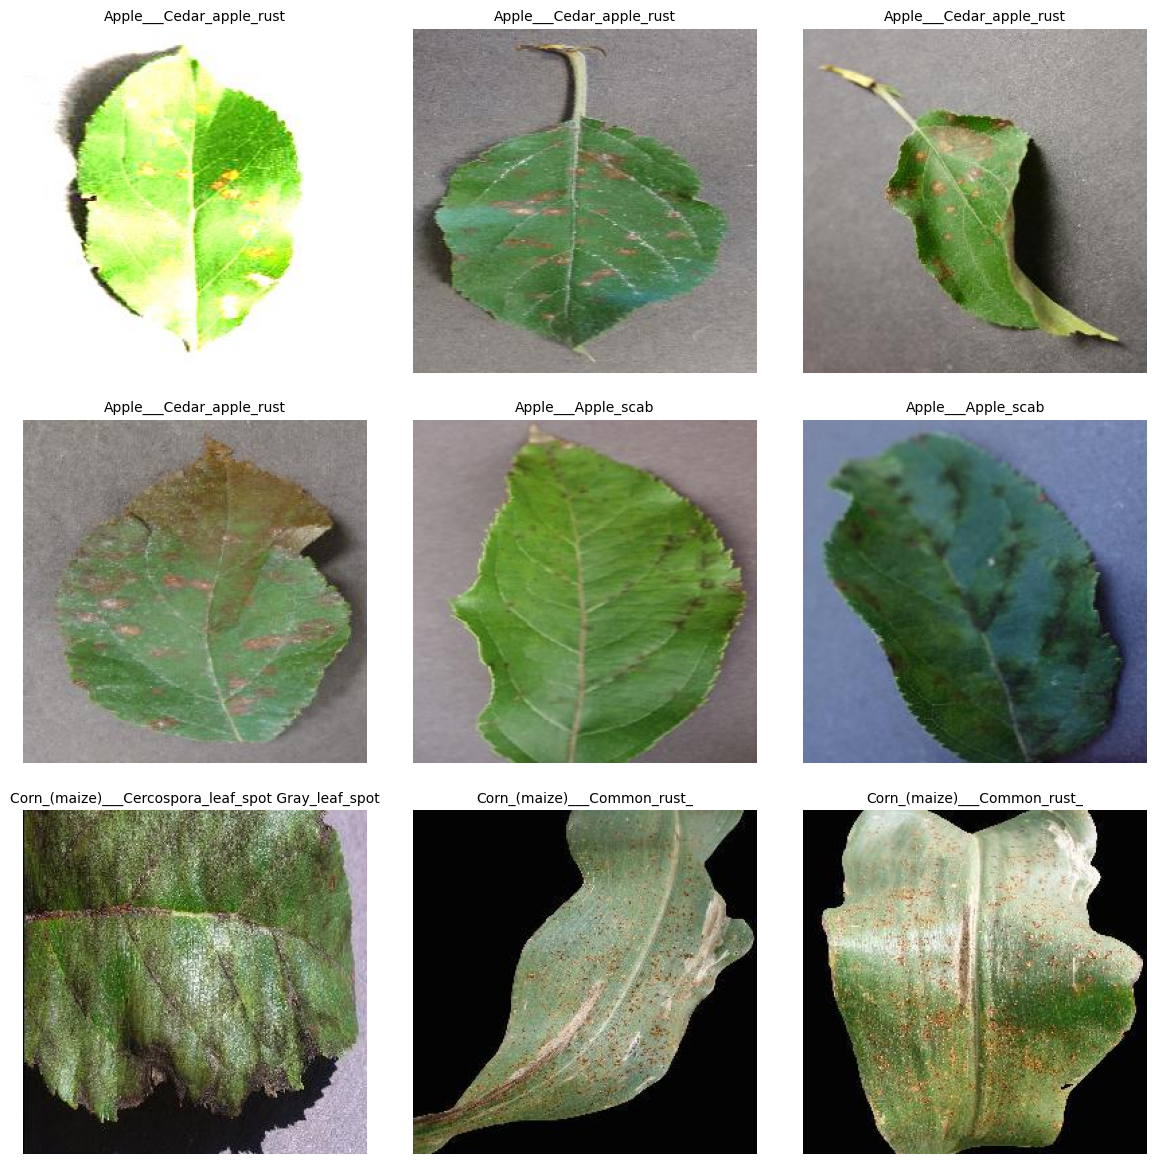

In [11]:
# Predict on test images
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Map predictions to class labels
class_labels = list(train_data.class_indices.keys())
predicted_labels = [class_labels[k] for k in predicted_classes]

plt.figure(figsize=(12, 12))  # Bigger figure

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(plt.imread(test_image_paths[i]))
    plt.title(predicted_labels[i], fontsize=10)  # Smaller font for titles
    plt.axis('off')

plt.tight_layout(pad=2.0)  # Add spacing between images
plt.show()



In [12]:
# Save the model
model.save("plant_disease_model.h5")

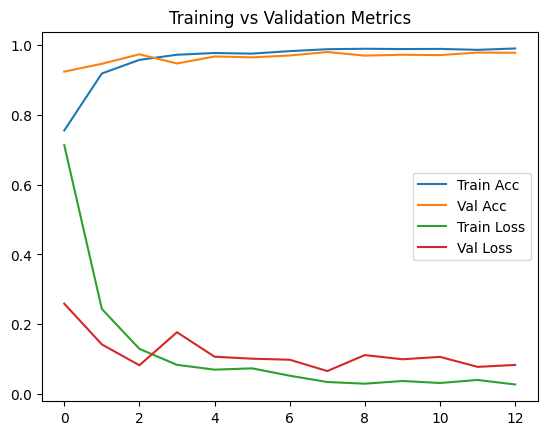

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Training vs Validation Metrics")
plt.show()


In [14]:
from sklearn.metrics import classification_report, confusion_matrix
true_labels = valid_data.classes
valpredicted_classes = np.argmax(model.predict(valid_data), axis=1)

print(confusion_matrix(true_labels, valpredicted_classes))
print(classification_report(true_labels, valpredicted_classes, target_names=class_labels))


73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 264ms/step
[[58 58 41 48 48 37 53 48 52 61]
 [51 50 42 61 48 44 51 49 42 59]
 [47 45 43 52 45 41 30 40 46 51]
 [45 44 41 65 54 66 51 57 35 44]
 [31 63 60 50 46 37 50 25 52 40]
 [56 53 46 41 26 33 39 33 48 46]
 [56 39 51 35 37 43 45 53 45 52]
 [33 49 48 36 45 40 40 36 48 35]
 [54 51 41 63 55 42 44 33 59 35]
 [57 55 45 54 33 44 49 41 45 42]]
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.12      0.12      0.12       504
                                 Apple___Black_rot       0.10      0.10      0.10       497
                          Apple___Cedar_apple_rust       0.09      0.10      0.10       440
                                   Apple___healthy       0.13      0.13      0.13       502
                               Blueberry___healthy       0.11      0.10      0.10       454
          Cherry_(including_sour)___Powdery_mildew       0.08      0.08   